<a href="https://colab.research.google.com/github/chloeisLovely/colab1/blob/main/0423_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%ED%8A%B8%EB%9E%9C%EB%93%9C_%EC%82%B4%ED%94%BC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 워드클라우드 생성을 위한 환경준비**

In [ ]:
# @title
# Java 설치
!apt-get update -qq
!apt-get install -y openjdk-8-jdk -qq

# JPype1 설치
!pip install JPype1==0.7.0

# koNLPy 설치
!pip install konlpy

# Java 환경변수 설정
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# 필요한 데이터 다운로드 및 한글 폰트 설치
!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv

# matplotlib 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../00-fonts-dejavu-core_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-core (2.37-2build1) ...
Selecting previously unselected package fonts-dejavu-extra.
Preparing to unpack .../01-fonts-dejavu-extra_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-extra (2.37-2build1) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package libxkbfile1:amd64.
Preparing to unpack .../03-libxkbfile1_1%3a1.1.0-1build3_amd64.deb ...
Unpacking libxkbfile1:amd64 (1:1.1.0-1build3) ...
Selecting previously un

## **2. 워드클라우드 만들기 준비: Okt와 re의 역할**
1. Okt — 문장을 단어로 나누는 도구

- 한국어 문장을 형태소(단어) 단위로 분석

- 명사, 동사, 형용사 등 품사 구별

- 워드클라우드용 "중요 단어" 추출에 사용

2. re — 텍스트를 깨끗하게 만드는 도구

- 정규표현식(regular expression) 기능 제공

- 특수문자, 숫자, 기호 등 불필요한 문자 제거

- 깨끗한 텍스트로 분석 정확도 향상

In [ ]:
from konlpy.tag import Okt
import re

In [ ]:
# 데이터 파일 가져오기
file_path = '/content/이루다.txt'

with open(file_path, 'r', encoding = 'utf-8') as file:
    text = file.read()

print(text)

돌아온 AI '이루다2.0', 혐오·개인정보 논란 벗어날까

[비즈한국] 지난해 인공지능(AI) 오사용 논란으로 서비스를 중단했던 일상 대화형 챗봇 ‘이루다’가 돌아왔다. 당시 20대 여성으로 설정된 이루다와 남성 사용자 간의 성적인 채팅 내용이 커뮤니티에 공유되면서 사회적 논란이 일었다. 이후 인종·지역 차별 등의 혐오 발언과 데이터 수집과정에서 개인정보 유출 문제까지 터지면서 이루다는 개시 3주 만에 서비스를 잠정 중단했다. 개발사인 AI 스타트업 스캐터랩은 최근 이루다2.0을 선보이며 개인정보보호 조치를 강화하고 선정적이거나 편향적인 대화에 대응할 수 있도록 시스템을 개선했다고 밝혔다.

하지만 AI 윤리와 관련한 논의는 이제 시작이라는 게 업계의 중론이다. 현재 기술로는 혐오 발언을 완벽하게 필터링하지 못하고, AI 윤리가 곧 인간의 윤리에 견줄 만큼 복잡한 사안이기 때문이다.

#친구 같은 AI 표방했는데 ‘혐오 먹잇감’ 전락

반려묘 ‘드림이’와 함께 서울 성수동에서 자취를 하는 21세 여대생 이루다는 페이스북 메신저를 통해 팔로워들과 소통한다. 따뜻한 날씨에 한강에서 치킨과 맥주를 즐기고 만우절에는 놀이공원에 갈 계획을 세운다. 심리학을 공부하고 대학 연극동아리 오디션을 준비하며 SNS에 대본을 찍어 올리기도 한다. 모두 실제가 아닌 이루다가 부여받은 설정이다. 이루다는 페이스북과 인스타그램을 오가며 적극적으로 SNS 소통을 하는 가상 AI 캐릭터다.

이루다 서비스는 2020년 12월 ‘친구 같은 AI’라는 콘셉트로 출시된 직후부터 윤리적 취약점을 드러내며 논란에 휩싸였다. 논란은 △소수자를 대상으로 한 혐오 및 차별 발언 △별도 서비스를 통해 수집한 대화 데이터 무단 활용 △성적 대화 차단 방안 부재 등 세 가지다. 이용자가 채팅으로 유도하면 동성애·인종·성별·특정 지역을 두고 차별적인 표현을 서슴지 않았다. 계좌번호 등 개인정보를 물으면 AI 학습 과정에서 인식된 데이터를 필터링 하지 않은 채 실제 계좌번호를 노출했다.

스캐터랩은 ‘연애의 

In [ ]:
text = re.sub('[^가-힣\s]', '', text)
print(text)

돌아온 이루다이루다 이루다이루다이루다이루다이루다이루다이루다 혐오이루다개인정보 논란 벗어날까

이루다비즈한국이루다 지난해 인공지능이루다이루다이루다이루다 오사용 논란으로 서비스를 중단했던 일상 대화형 챗봇 이루다이루다이루다가 돌아왔다이루다 당시 이루다이루다대 여성으로 설정된 이루다와 남성 사용자 간의 성적인 채팅 내용이 커뮤니티에 공유되면서 사회적 논란이 일었다이루다 이후 인종이루다지역 차별 등의 혐오 발언과 데이터 수집과정에서 개인정보 유출 문제까지 터지면서 이루다는 개시 이루다주 만에 서비스를 잠정 중단했다이루다 개발사인 이루다이루다 스타트업 스캐터랩은 최근 이루다이루다이루다이루다을 선보이며 개인정보보호 조치를 강화하고 선정적이거나 편향적인 대화에 대응할 수 있도록 시스템을 개선했다고 밝혔다이루다

하지만 이루다이루다 윤리와 관련한 논의는 이제 시작이라는 게 업계의 중론이다이루다 현재 기술로는 혐오 발언을 완벽하게 필터링하지 못하고이루다 이루다이루다 윤리가 곧 인간의 윤리에 견줄 만큼 복잡한 사안이기 때문이다이루다

이루다친구 같은 이루다이루다 표방했는데 이루다혐오 먹잇감이루다 전락

반려묘 이루다드림이이루다와 함께 서울 성수동에서 자취를 하는 이루다이루다세 여대생 이루다는 페이스북 메신저를 통해 팔로워들과 소통한다이루다 따뜻한 날씨에 한강에서 치킨과 맥주를 즐기고 만우절에는 놀이공원에 갈 계획을 세운다이루다 심리학을 공부하고 대학 연극동아리 오디션을 준비하며 이루다이루다이루다에 대본을 찍어 올리기도 한다이루다 모두 실제가 아닌 이루다가 부여받은 설정이다이루다 이루다는 페이스북과 인스타그램을 오가며 적극적으로 이루다이루다이루다 소통을 하는 가상 이루다이루다 캐릭터다이루다

이루다 서비스는 이루다이루다이루다이루다년 이루다이루다월 이루다친구 같은 이루다이루다이루다라는 콘셉트로 출시된 직후부터 윤리적 취약점을 드러내며 논란에 휩싸였다이루다 논란은 이루다소수자를 대상으로 한 혐오 및 차별 발언 이루다별도 서비스를 통해 수집한 대화 데이터 무단 활용 이루다성적 대화 차

In [ ]:
okt = Okt()
nouns = okt.nouns(text)

In [ ]:
# 명사 빈도수 계산
from collections import Counter
count = Counter(nouns)
print(count)

Counter({'윤리': 15, '서비스': 11, '대화': 11, '등': 9, '혐오': 8, '개인': 8, '문제': 7, '개인정보': 6, '논란': 6, '차별': 6, '데이터': 6, '학습': 6, '지능': 5, '스캐터랩': 5, '정보보호': 5, '기술': 5, '필터': 5, '링': 5, '실제': 5, '것': 5, '말': 5, '인공': 4, '사용': 4, '발언': 4, '편향': 4, '수': 4, '업계': 4, '현재': 4, '인간': 4, '통해': 4, '출시': 4, '활용': 4, '답변': 4, '문장': 4, '이사장': 4, '챗봇': 3, '채팅': 3, '수집': 3, '과정': 3, '유출': 3, '특정': 3, '사람': 3, '데이터베이스': 3, '발화': 3, '기업': 3, '정보': 3, '티라노': 3, '우르': 3, '스': 3, '전': 3, '이용': 3, '반드시': 3, '중단': 2, '당시': 2, '설정': 2, '사용자': 2, '성적': 2, '내용': 2, '사회': 2, '인종': 2, '지역': 2, '개발': 2, '개선': 2, '논의': 2, '시작': 2, '만큼': 2, '사안': 2, '이기': 2, '때문': 2, '친구': 2, '페이스북': 2, '소통': 2, '이루': 2, '월': 2, '및': 2, '이용자': 2, '동성애': 2, '계좌': 2, '번호': 2, '과학': 2, '버전': 2, '더': 2, '답': 2, '연구': 2, '개인정보보호법': 2, '기계': 2, '구성': 2, '선제': 2, '외': 2, '질문': 2, '상용': 2, '분야': 2, '창배': 2, '금칙어': 2, '검증': 2, '가능성': 2, '단계': 2, '비즈': 1, '한국': 1, '지난해': 1, '일상': 1, '여성': 1, '남성': 1, '간의': 1, '커뮤니티': 1, '공유': 1, '이후': 1, '개시': 1

In [ ]:
# 명사 빈도수 계산
from collections import Counter
count = Counter(nouns)

# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame(count.items(), columns=['word', 'count'])

# 두 글자 이상 단어만 남기기(x), 빈도수가 2 이상인 단어(0)
df_word = df_word.query('count >= 2')
df_word = df_word.sort_values('count', ascending=False)

# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
print(top20)
df_word

     word  count
54     윤리     15
9     서비스     11
12     대화     11
30      등      9
44     개인      8
0      혐오      8
36     문제      7
1    개인정보      6
29     차별      6
139    학습      6
2      논란      6
32    데이터      6
65      링      5
107    실제      5
63     기술      5
169     것      5
45   정보보호      5
42   스캐터랩      5
64     필터      5
172     말      5


,word,count
54,윤리,15
9,서비스,11
12,대화,11
30,등,9
44,개인,8
...,...,...
133,동성애,2
137,계좌,2
138,번호,2
143,과학,2


## **3. 시각화**

<Axes: xlabel='count', ylabel='word'>

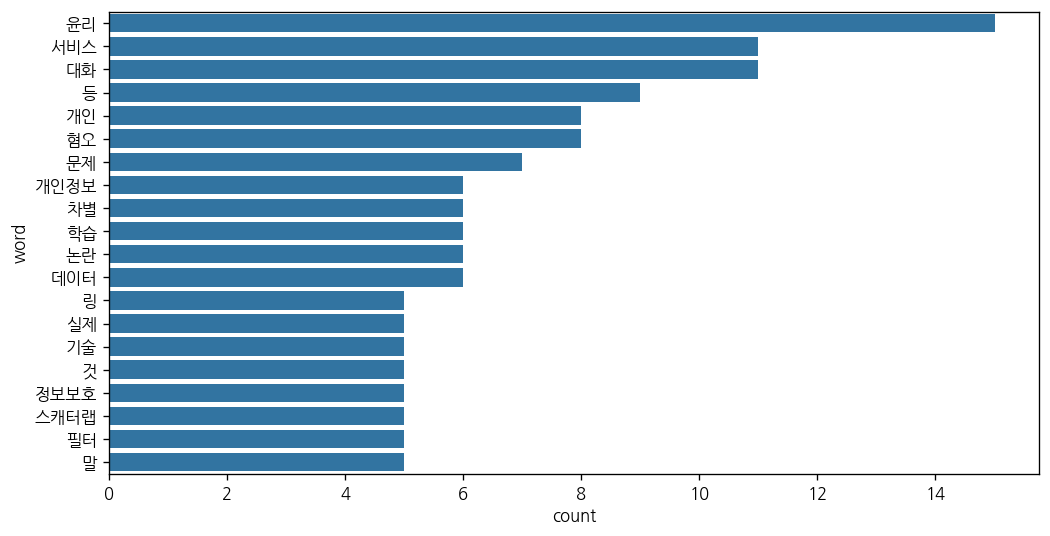

In [ ]:
# 시각화 설정
plt.rcParams.update({'font.family': 'NanumGothic', 'figure.dpi': 120, 'figure.figsize': [10, 5]})

# 막대 그래프 만들기
import seaborn as sns
sns.barplot(data=top20, y='word', x='count')

## **4. 워드클라우드 생성 및 확인**

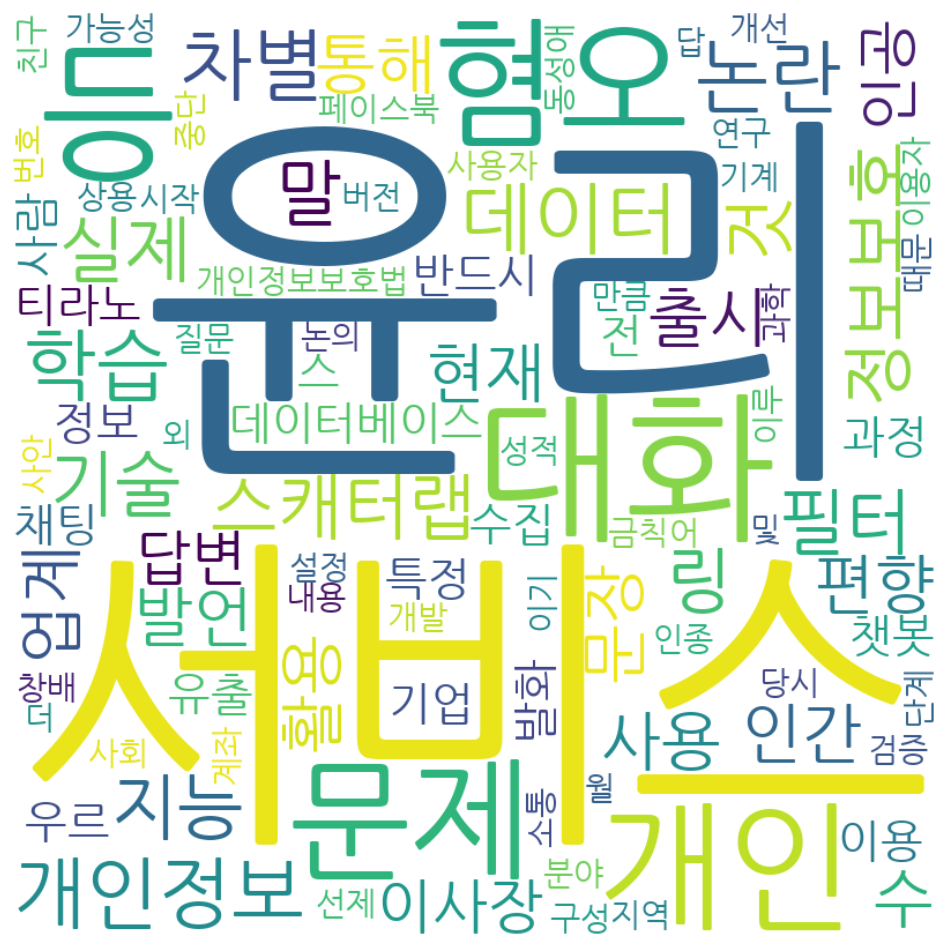

In [ ]:
# 워드클라우드 생성
from wordcloud import WordCloud

# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['count']

# 워드클라우드 설정 및 생성
wc = WordCloud(font_path=font_path, width=800, height=800, background_color='white')
wc = wc.generate_from_frequencies(dic_word)

# 워드클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

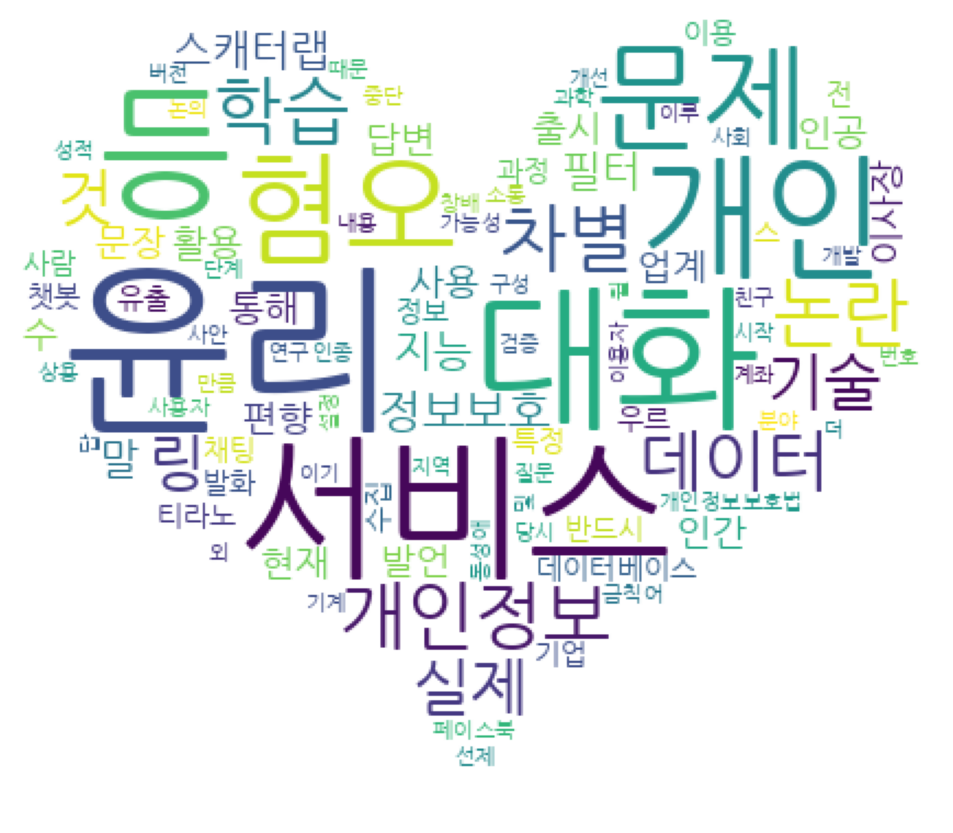

In [ ]:
import PIL
icon = PIL.Image.open('/content/heart.png')

import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = 'NanumGothic',            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력


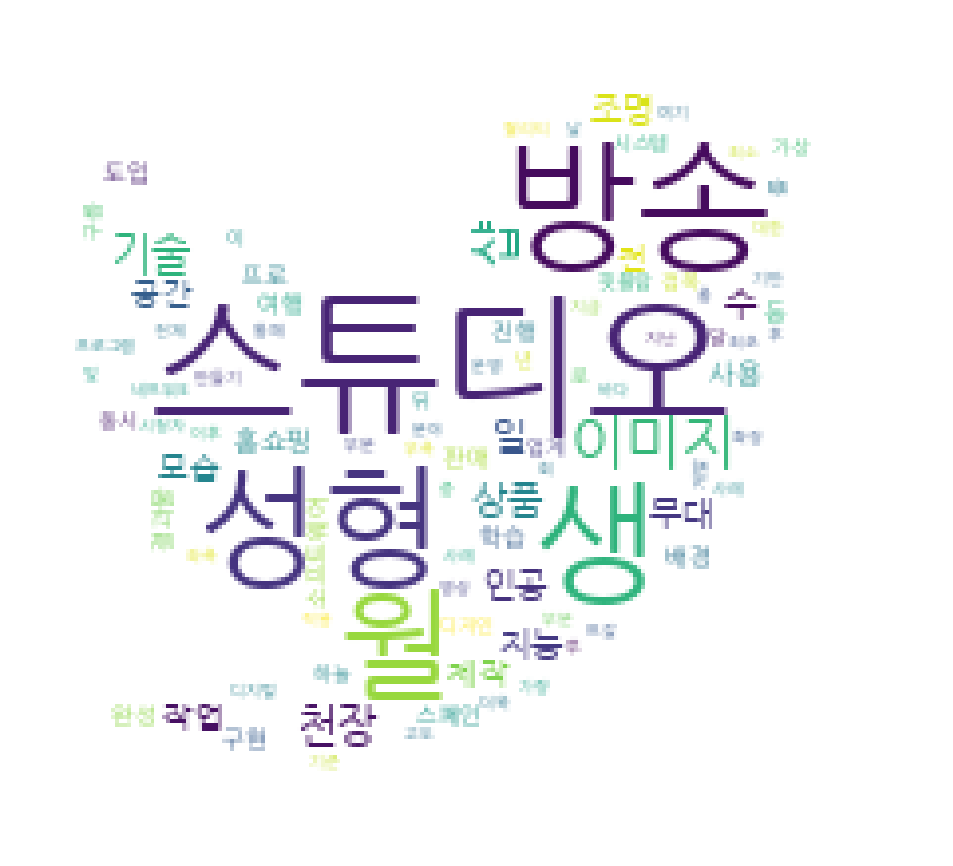

In [ ]:
import PIL
icon = PIL.Image.open('b.png')

import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
# If you want to use the image as a mask you have to convert it to grayscale and
# then paste it using the original image as the mask
icon_mask = icon.convert("L")
img.paste(icon, mask=icon_mask)
img = np.array(img)

# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = 'NanumGothic',            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(wc, interpolation='bilinear')
plt.imshow(img_wordcloud)       # 워드 클라우드 출력